In [2]:
## 3계층의 신경망으로 MNIST 데이터를 학습하는 코드

# numpy : 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있게 해주는 파이썬 라이브러리
import numpy
# 시그모이드 함수 사용을 위해 scipy.special 라이브러리 불러와서 expit() 함수 씀  
import scipy.special
# 행렬 시각화를 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재 노트북에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 wih & who
        # wih = (은닉 노드 * 입력 노드) 의 크기를 가지는 입력 -> 은닉 가중치 행렬 WI
        # who = (출력 노드 * 은닉 노드) 의 크기를 가지는 은닉 -> 입력 가중치 행렬 WH
        # numpy.random.rand(행, 열) : 0 ~ 1 사이의 값
        # self.wih = numpy.random.rand(self.hnodes, self,inodes) - 0.5
        # self.who = numpy.random.rand(self.onodes, self,hnodes) - 0.5
        
        # 더 정교하게 가중치 초기화
        # 1/ 루트(들어오는 연결 노드의 개수) 의 표준편차를 가지는 정규분포
        # pow 함수로 제곱
        # numpy.random.normal(정규 분포의 중심, 표준편차, (행, 열))
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로 시그모이드 함수 이용
        # 람다 익명 함수 : 매개변수를 x로해서 시그모이드 함수를 activation_function()에 할당 
        # expit : 시그모이드 함수
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습
    def train(self, inputs_list, targets_list):        
        # 입력 리스트를 2차원 행렬로 변환
        # numpy.transpose() == .T
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 계층으로 들어오는 신호 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)

        # 출력 계층 오차는 (실제값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나누니 출력 계층의 오차들을 재조합해 계산
        # hidden_errors = W tras * errors 
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # Wjk = 학습률 * 에러k * sigmoid(Ok) * (1- sigmoid(Ok)) * OjT
        # 시그모이드 : 활성화 함수
        
        # numpy.dot() : 매트릭스의 곱 계산
        # numpy.transpose() 행과 열을 바꿈 
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망 질의
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 계층으로 들어오는 신호 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 계층에서 나가는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

input_nodes = 784
# 임시 : 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냄 -> 이러한 특징 또는 패턴은 입력 값의 수보다는 작은 형태로 표현 -> 주요 특징 찾아냄
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.3

# 신경망 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
# readlines() 는 쉽지만 불러오는 데이터 너무 클떄는 전체파일을 메모리에 올리기 떄문에 비효율
training_data_list = training_data_file.readlines()
training_data_file.close()

# epoch(주기) : 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 5

for e in range(epochs):
    print(e)
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        
        # asfarray() 문자열을 실수로 변환 한 다음에 그 숫자로 구성된 배열을 생성
        # reshape((28,28)) 는 28*28의 정방행렬로 만들어줌
        # image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
        # cmap = 'Greys' 를 지정해 회색톤의 색상 팔레트를 사용
        # matplotlib.pyplot.imshow(image_array, cmap ='Greys', interpolation='None')

        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        
        # 결과 값 생성 (실제 값 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] =0.99
        n.train(inputs, targets)
        pass
    pass


# mnist 테스트 데이터 
training_data_file = open("mnist_dataset/mnist_test.csv", 'r')
# readlines() 는 쉽지만 불러오는 데이터 너무 클떄는 전체파일을 메모리에 올리기 떄문에 비효율
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 테스트 

# 신경망의 성능의 지표가 되는 성적표 초기화 
scorecard = []

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
#     print (correct_label, "correct label")
    # asfarray() 문자열을 실수로 변환 한 다음에 그 숫자로 구성된 배열을 생성
    # reshape((28,28)) 는 28*28의 정방행렬로 만들어줌
    # image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
    # cmap = 'Greys' 를 지정해 회색톤의 색상 팔레트를 사용
    # matplotlib.pyplot.imshow(image_array, cmap ='Greys', interpolation='None')
    
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) +0.01
    
    # 신경망에 질의
    output = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    # argmax 가장 큰값을 찾아 그 위치를 알려주는 함수
    label = numpy.argmax(output)
#     print(label, "network's answer")
    
    # 정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

# 정답의 비율인 성적을 계산해 출력
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

#     # 결과 값 생성 (실제 값이 0.99 외에는 모두 0.01)
#     targets = numpy.zeros(output_nodes)+0.01
#     # all_values[0]은 이 레코드에 대한 결과 값
#     targets[int(all_values[0])] = 0.99
#     n.train(inputs, targets)
    
#     pass
# Xh = Wi * Input
# hidden_inputs = numpy.dot(self.wih inputs)
# numpy.dot 같은 방법을 통해 바로 계산가능
# 은닉 계층에서 나오는 값은
# Oh = sigmoid(Xh)
# TODO 왜 가중치의 나누기를 하는걸까? 값과 가중치의 곱일수도 있는데.. 
# 경사 하강법 

0
1
2
3
4
performance =  0.9618


In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

numpy.random.rand(3, 3) - 0.5

In [4]:
n.query([1.0, 0.5, -1.5])

array([[ 0.44642062],
       [ 0.43735163],
       [ 0.39105812]])

In [5]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
# readlines() 는 쉽지만 불러오는 데이터 너무 클떄는 전체파일을 메모리에 올리기 떄문에 비효율
data_list = data_file.readlines()
data_file.close()


In [6]:
len(data_list)

100

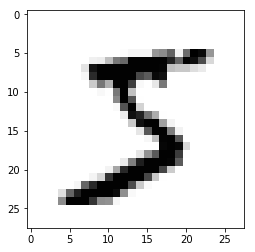

In [7]:
import numpy
import matplotlib.pyplot
%matplotlib inline
all_values = data_list[0].split(',')
# asfarray() 문자열을 실수로 변환 한 다음에 그 숫자로 구성된 배열을 생성
# reshape((28,28)) 는 28*28의 정방행렬로 만들어줌
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
# cmap = 'Greys' 를 지정해 회색톤의 색상 팔레트를 사용
matplotlib.pyplot.imshow(image_array, cmap ='Greys', interpolation='None')


In [8]:
# 0~255의 값을 가지는 색상값을 255로 나눈뒤 0.99를 곱하고 0.01 을 더하여 0.01 ~ 1 사이의 값을 갖도록 함
# 입력값이 0을 가지면 가중치 없데이트를 없애버리므로 안좋음
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99)+ 0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [9]:
# 출력 계층의 노드 수를 10으로 0~9 까지 나와야하니...
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99


In [10]:
print(targets)

[ 0.01  0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01]


In [1]:
print("?")

?
